# Homework 5 #

Import statements, load NMC graphite parameters

In [24]:
import pybamm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%autoreload 2

from parameters.NMC_graphite_parameters import get_parameter_values

parameter_values = get_parameter_values()
parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Cation transference number': 0.2594,
 'Current function [A]': 5.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x000001CD1EF9F9C0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x000001CD1EF9F7E0>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 30170.0,
 'Initial concentration in positive electrode [mol.m-3]': 16653.0,
 'Initial temperature [K]': 298.15,
 'Lower voltage cut-off [V]': 2.5,
 'Maximum concentration in negative electrode [mol.m-3]': 33133.0,
 'Maximum concentration in positive electrode [mol.m-3]': 63104.0,
 'Negative electrode Bruggeman coefficient (

Display mission data for chosen aircraft Beta Alia, assign max takeoff and structural mass

In [26]:
import pandas as pd

filenames = ["Lilium_Jet", "KH_Heaviside", "Joby_5seater", "Beta_Alia", "Archer_Maker"]
filename = filenames[3]
df = pd.read_csv("powerprofiles/" + filename + ".csv")
df

,Segment,Times,PowerkW,EnergykWh,Rangem,Altitudem,Airspeedmps,TemperatureK,SpeedOfSoundmps,PressurePa,Densitykgpm3
0,TakeOff start,1.000000,661.959452,0.000000,0.000000,0,0.000000,288.1500,340.294124,101325.000000,1.225000
1,TakeOff end,16.000000,661.482919,2.757172,0.000000,15,0.000000,288.0525,340.236548,101144.932646,1.223237
2,TransitionUp start,17.000000,661.959452,2.757172,0.000000,15,0.000000,288.0525,340.236548,101144.932646,1.223237
3,TransitionUp end,47.000000,242.792662,6.526972,0.000000,15,34.629368,288.0525,340.236548,101144.932646,1.223237
4,Climb start,48.000000,259.613394,6.526972,0.000000,15,37.211678,288.0525,340.236548,101144.932646,1.223237
5,Climb end,499.818182,270.937847,39.820402,18083.479005,2500,42.073687,271.9000,330.559576,74682.535880,0.956859
6,Cruise start,500.818182,130.154118,39.820402,18083.479005,2500,67.056000,271.9000,330.559576,74682.535880,0.956859
7,Cruise end,7277.243856,130.154118,284.814766,472483.479005,2500,67.056000,271.9000,330.559576,74682.535880,0.956859
8,Descent start,7278.243856,-74.944160,284.814766,472483.479005,2500,42.073687,271.9000,330.559576,74682.535880,0.956859
9,Descent end,7730.062038,-86.268614,274.698257,472483.479005,15,37.211678,288.0525,340.236548,101144.932646,1.223237


In [27]:
mtom_beta_alia = 2730 #kg
structure_weight_beta_alia = 0.4*mtom_beta_alia

Part 1

In [28]:
# (i) Cell nominal voltage
nom_V = 3.63 # V

# (ii) Cell nominal capacity
nom_E = 18.2 #Wh
nom_C = nom_E/nom_V #Ah

print(f"Nominal Voltage (V): {nom_V}")
print(f"Nominal Capacity (Ah): {nom_C}")

# (iii) Max discharge rate (in A)
max_D_current = 7275e-3 # A
max_D_rate = 1.5 # C
print(f"Max Discharge Rate (A): {max_D_rate}")
### Max discharge rate is 1.5C, not the current 

weight = 68e-3 # kg
max_V = 4.2
spec_P = max_D_current*max_V/weight

# (iv) Cell specific energy
spec_E = spec_P*2/3/weight
print(f"Specific Energy (Wh/kg): {spec_E}")

# (v) Cell specific power
print(f"Specific Power (W/kg): {spec_P}")

# (vi) Voltage limits of operation
min_V = 2.5 
print(f"Minimum Voltage (V): {min_V}")
print(f"Maximum Voltage (V): {max_V}")

Nominal Voltage (V): 3.63
Nominal Capacity (Ah): 5.013774104683195
Max Discharge Rate (A): 1.5
Specific Energy (Wh/kg): 4405.276816608996
Specific Power (W/kg): 449.3382352941177
Minimum Voltage (V): 2.5
Maximum Voltage (V): 4.2


Part 2

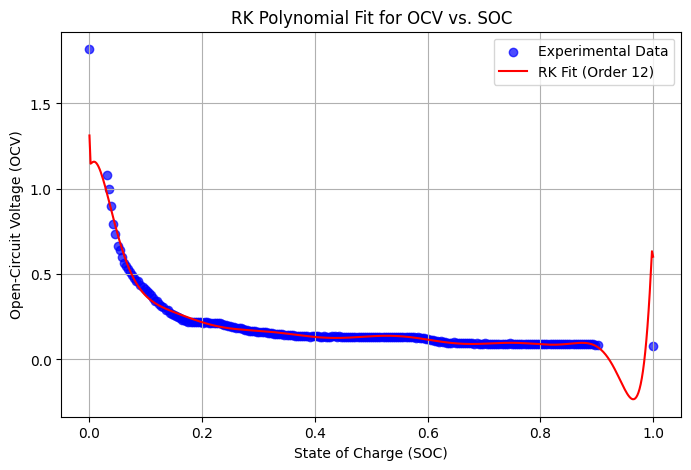

Fitted U0: 0.9573 V
L_0: -3.2857
L_1: -0.5700
L_2: -5.2436
L_3: 17.9478
L_4: 17.9808
L_5: -147.0343
L_6: -90.3114
L_7: 523.0533
L_8: 163.1716
L_9: -825.4933
L_10: -117.0356
L_11: 483.9968


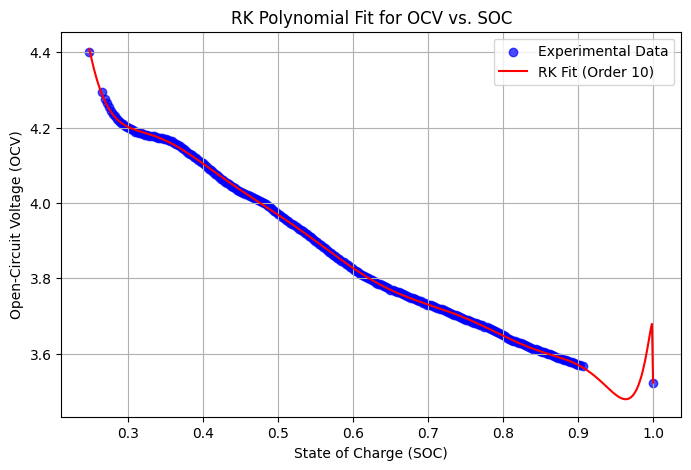

Fitted U0: 3.8781 V
L_0: 0.3629
L_1: 2.4389
L_2: -0.7583
L_3: 9.1349
L_4: 30.1250
L_5: -91.1373
L_6: -270.1961
L_7: 162.3915
L_8: 782.6436
L_9: 481.8316


In [105]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import math

R = parameter_values['Ideal gas constant [J.K-1.mol-1]']
T = parameter_values['Reference temperature [K]']
F = parameter_values['Faraday constant [C.mol-1]']

# load the file and clean the data
file_path_neg = 'C:/Users/hueyf/UMich/CMU_energy_storage_HW5/parameters/graphite_LGM50_ocp_Chen2020.csv'
file_path_pos = 'C:/Users/hueyf/UMich/CMU_energy_storage_HW5/parameters/nmc_LGM50_ocp_Chen2020.csv'

files = [file_path_neg, file_path_pos]
orders = [12,10]
rk_polynomials = []

# Define the RK OCV model
def rk_ocv_model(x, U0, *coefficients):
    log_term = (R * T / F) * np.log((1 - x) / x)  # Logarithmic term
    rk_sum = sum(coefficients[i] * (1 - 2 * x)**i for i in range(len(coefficients)))  # RK sum
    excess_term = (1 - x) * x * rk_sum  # Excess enthalpy term
    return U0 + log_term + excess_term

for file_path, order in zip(files, orders):
    data = pd.read_csv(file_path, comment="#", header=None, names=["sto", "ocp"])
    data_cleaned = data.dropna()

    # Extract x and y 
    x_data = data_cleaned["sto"].values
    y_data = data_cleaned["ocp"].values

    # Clip SOC values to avoid log issues at x=0 and x=1
    epsilon = 1e-6
    x_data = np.clip(x_data, epsilon, 1 - epsilon)


    # Initial guess for parameters
    num_coeffs = order
    initial_guess = [3.7] + [0.1] * num_coeffs  # Initial U0 and RK coefficients

    # Fit the data
    popt, pcov = curve_fit(rk_ocv_model, x_data, y_data, p0=initial_guess)

    # Extract fitted parameters
    U0_fitted = popt[0]
    rk_coeffs_fitted = popt[1:]

    # Generate smooth curve for visualization
    x_fit = np.linspace(x_data[0], x_data[-1], 500)
    y_fit = rk_ocv_model(x_fit, *popt)

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, label="Experimental Data", color="blue", alpha=0.7)
    plt.plot(x_fit, y_fit, label=f"RK Fit (Order {num_coeffs})", color="red")
    plt.xlabel("State of Charge (SOC)")
    plt.ylabel("Open-Circuit Voltage (OCV)")
    plt.title("RK Polynomial Fit for OCV vs. SOC")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print fitted coefficients
    print(f"Fitted U0: {U0_fitted:.4f} V")
    for i, coeff in enumerate(rk_coeffs_fitted):
        print(f"L_{i}: {coeff:.4f}")

    rk_polynomials.append(popt)



Part 3

In [ ]:
import pybamm

# Define RK OCP functions
# Negative electrode OCP based on RK polynomial.
def graphite_LGM50_ocp_Chen2020(sto):
    coeffs = rk_polynomials[0]
    

# Positive electrode OCP based on RK polynomial
def nmc_LGM50_ocp_Chen2020(sto):
    coeffs = rk_polynomials[1]
    return rk_ocv_model(sto, coeffs[0], *coeffs)

initial_soc = 0.5  # Default SOC for initial conditions
initial_voltage = nmc_LGM50_ocp_Chen2020(initial_soc) - graphite_LGM50_ocp_Chen2020(initial_soc)
print(nmc_LGM50_ocp_Chen2020(initial_soc))
print(graphite_LGM50_ocp_Chen2020(initial_soc))
print(f"Initial Cell Voltage: {initial_voltage} V")


# Create PyBaMM model and parameter set
model = pybamm.lithium_ion.DFN()  # Doyle-Fuller-Newman model
parameter_values = get_parameter_values()
parameter_values.update({
    "Negative electrode OCP [V]" : graphite_LGM50_ocp_Chen2020,
    "Positive electrode OCP [V]" : nmc_LGM50_ocp_Chen2020}, 
    check_already_exists=False)

parameter_values.update({
    # cathode-anode OCV for STO = 0, 1 respectively 
    "Open-circuit voltage at 100% SOC [V]" : nmc_LGM50_ocp_Chen2020(0) - graphite_LGM50_ocp_Chen2020(1),
    # cathode-anode OCV for STO = 1, 0 respectively 
    "Open-circuit voltage at 0% SOC [V]" : nmc_LGM50_ocp_Chen2020(1) - graphite_LGM50_ocp_Chen2020(0)}, 
    check_already_exists=False)

print(nmc_LGM50_ocp_Chen2020(0) - graphite_LGM50_ocp_Chen2020(1))
print(nmc_LGM50_ocp_Chen2020(1) - graphite_LGM50_ocp_Chen2020(0))
print(bounds)

# Create and solve the simulation
# Set up the experiment for 1C constant current discharge
experiment = pybamm.Experiment([
    "Discharge at 1C until 2.5V"
])

simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
solution = simulation.solve()

# Plot the results
simulation.plot()


8.80531595346133
2.7592802591664296
Initial Cell Voltage: 6.0460356942949005 V
4.323984691820701
1.7052941849638
[[1.81772748379334, 0.0760153081792987], [4.4, 3.52302166875714]]


At t = 4.39734 and h = 2.34409e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39736 and h = 2.3448e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39733 and h = 2.34348e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39734 and h = 2.3437e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39736 and h = 2.34506e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39733 and h = 2.34317e-09, the corrector convergence failed repeatedly or with |h| = hmin.
2025-01-16 12:43:23.635 - [ERROR] callbacks.on_experiment_error(233): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: 'Error in Function::call for 'F' [IdasInterface] at .../casadi/core/function.cpp:1432:
Error in Function::call for 'F' [IdasInterface] at .../casadi/core/function.cpp:361:
.../casadi/interfaces/sundials/idas_interface.cpp:596: IDASolve return

SolverError: Maximum number of decreased steps occurred at t=0.0 (final SolverError: 'Error in Function::call for 'F' [IdasInterface] at .../casadi/core/function.cpp:1432:
Error in Function::call for 'F' [IdasInterface] at .../casadi/core/function.cpp:361:
.../casadi/interfaces/sundials/idas_interface.cpp:596: IDASolve returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=600) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.

In [25]:
pybamm.__version__

'24.9.0'

Part 4

In [ ]:
# Calculate total energy, peak power, and required cells for EVTOL.
def calculate_battery_metrics(file_path, cell_energy_wh, cell_power_w):
    # Load data
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Calculate total energy required (kWh)
    total_energy_kwh = np.trapz(power, time) / 3600  # Convert Ws to kWh

    # Calculate peak power (kW)
    peak_power_kw = max(power)

    # Calculate required cells for energy
    total_cells_energy = total_energy_kwh * 1000 / cell_energy_wh

    # Calculate required cells for peak power
    total_cells_power = peak_power_kw * 1000 / cell_power_w

    return total_energy_kwh, peak_power_kw, total_cells_energy, total_cells_power

# Parameters for LGM50 cell
cell_energy_wh = nom_E  # Energy per cell in Wh
cell_power_w = spec_P*weight # Maximum power per cell in W

# plotting function 
def plot_power_vs_time(evtol, file_path):
    # Load data
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Plot power vs. time
    plt.plot(time, power, label=evtol)

    plt.xlabel("Time (s)")
    plt.ylabel("Power (kW)")
    plt.title("Power vs Time for EVTOL Designs")
    plt.legend()
    plt.grid(True)
    plt.show()

# EVTOL file paths
evtol_files = {
    "Archer Maker": "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Archer_Maker.csv",
    "Beta Alia": "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Beta_Alia.csv",
    "Joby 5-seater": "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Joby_5seater.csv",
    "KH Heaviside": "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/KH_Heaviside.csv",
    "Lilium Jet": "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Lilium_Jet.csv"
}

beta_alia_cells = 0
for evtol, file_path in evtol_files.items():

    total_energy_kwh, peak_power_kw, total_cells_energy, total_cells_power = calculate_battery_metrics(file_path, cell_energy_wh, cell_power_w)
    if evtol == "Beta Alia":   
        beta_alia_cells = total_cells_energy
    print(f"EVTOL: {evtol}")
    # Plot power vs time
    plot_power_vs_time(evtol, file_path)
    print(f"Total Energy Required: {total_energy_kwh:.2f} kWh")
    print(f"Peak Power Required: {peak_power_kw:.2f} kW")
    print(f"Cells Required for Energy: {total_cells_energy:.0f}")
    print(f"Cells Required for Peak Power: {total_cells_power:.0f}")
    print("_________________________________________________________________________________________________")

Part 5

In [ ]:
import math
print(math.ceil(beta_alia_cells))

In [ ]:
# Create a PyBaMM experiment for an EVTOL mission with constant-power segments
def create_evtol_experiment(file_path, total_cells):
    # Load EVTOL power profile
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Calculate power per cell
    power_per_cell = power / total_cells

    # Break the mission into constant-power segments
    mission_segments = []
    for i in range(len(time) - 1):
        duration_minutes = (time[i + 1] - time[i]) / 60  # Convert duration to minutes
        power_kw = power_per_cell[i]*1e3
        segment = f"Discharge at {power_kw:.2f} W for {duration_minutes:.2f} minutes"
        mission_segments.append(segment)

    # Create PyBaMM experiment
    experiment = pybamm.Experiment(mission_segments)
    return experiment


experiment = create_evtol_experiment("C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Beta_Alia.csv", math.ceil(beta_alia_cells))

print(experiment)
# Create simulation with the experiment
simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
solution = simulation.solve()

# Plot the results
simulation.plot()


Part 6

In [ ]:
# Function to adjust the number of cells to complete the EVTOL mission
def adjust_cells_for_mission(file_path, cell_energy_wh): 
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Calculate total energy required (kWh)
    total_energy_kwh = np.trapz(power, time) / 3600  # Convert Ws to kWh

    # Start with an estimated number of cells and adjust
    estimated_cells = int(np.ceil(total_energy_kwh * 1000 / cell_energy_wh))
    while True:
        power_per_cell = power / estimated_cells
        if all(power_per_cell * 1000 <= cell_energy_wh):  # Check if energy per cell is feasible
            break
        estimated_cells += 1

    return estimated_cells

# Create a PyBaMM experiment for an EVTOL mission using constant-power segments.
def create_evtol_experiment(file_path, total_cells):
    # Load EVTOL power profile
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Calculate power per cell
    power_per_cell = power / total_cells

    # Break the mission into constant-power segments
    mission_segments = []
    for i in range(len(time) - 1):
        duration_minutes = (time[i + 1] - time[i]) / 60  # Convert duration to minutes
        power_kw = power_per_cell[i]*1e3
        segment = f"Discharge at {power_kw:.2f} W for {duration_minutes:.2f} minutes"
        mission_segments.append(segment)

    # Create PyBaMM experiment
    experiment = pybamm.Experiment(mission_segments)
    return experiment

beta_alia_cells = adjust_cells_for_mission("C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Beta_Alia.csv", cell_energy_wh)
experiment = create_evtol_experiment("C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Beta_Alia.csv", math.ceil(beta_alia_cells))

print(experiment)
# Create simulation with the experiment
simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
solution = simulation.solve()

# Plot the results
simulation.plot()

Part 7

In [ ]:
def calculate_battery_pack_weight(num_cells, cell_mass, overhead_factor=1.3, mtom=2730):
    # Battery pack weight including overhead
    battery_pack_weight = num_cells * cell_mass * overhead_factor

    # Total allowable weight for battery + payload
    allowable_weight = 0.6 * mtom

    # Remaining weight for payload
    remaining_payload = allowable_weight - battery_pack_weight

    return battery_pack_weight, remaining_payload

# Example values
cell_mass = 0.068  # kg (from spec sheet)
num_cells = beta_alia_cells
battery_weight, payload_weight = calculate_battery_pack_weight(num_cells, cell_mass)

print(f"Total Battery Pack Weight: {battery_weight:.2f} kg")
print(f"Remaining Payload Weight: {payload_weight:.2f} kg")


Part 8

In [ ]:
def optimize_num_cells(file_path, cell_energy_wh, cell_mass, mtom):
    # Load mission profile
    data = pd.read_csv(file_path)
    time = data['Times']  # Assuming time in seconds
    power = data['PowerkW']  # Assuming power in kW

    # Total energy required for the mission (Wh)
    total_energy_wh = np.trapz(power, time) / 3600  # Convert Ws to Wh

    # Start with an estimated number of cells and adjust downwards
    min_cells = int(np.ceil(total_energy_wh / cell_energy_wh))

    while True:
        battery_weight, remaining_payload = calculate_battery_pack_weight(min_cells, cell_mass, mtom=mtom)

        # Ensure the payload is non-negative
        if remaining_payload >= 0:
            break
        min_cells += 1  # Increase the number of cells if the payload is negative

    return min_cells, battery_weight, remaining_payload

file_path = "C:/Users/hueyf/UMich/CMU_energy_storage_HW5/powerprofiles/Beta_Alia.csv"
optimized_cells, optimized_weight, optimized_payload = optimize_num_cells(file_path, nom_E, cell_mass, 2730)

print(f"Optimized Number of Cells: {optimized_cells}")
print(f"Optimized Battery Pack Weight: {optimized_weight:.2f} kg")
print(f"Remaining Payload Weight: {optimized_payload:.2f} kg")


Part 9

In [ ]:
def modify_battery_parameters(params, factor=5):
    modified_params = params.copy()
    
    # Increase key transport/kinetic parameters
    modified_params["Negative electrode diffusivity [m2.s-1]"] *= factor
    modified_params["Positive electrode diffusivity [m2.s-1]"] *= factor
    modified_params["Negative electrode exchange-current density [A.m-2]"] *= factor
    modified_params["Positive electrode exchange-current density [A.m-2]"] *= factor
    
    return modified_params

# mess around here?
optimized_params = modify_battery_parameters(get_parameter_values())
print("Modified Battery Parameters:", optimized_params)


Part 10

In [ ]:
# Define CCCV charging protocol
experiment = pybamm.Experiment([
    "Charge at 1C until 4.2V",
    "Hold at 4.2V until current drops to C/20"
])

# Set up and run simulation
simulation = pybamm.Simulation(model, experiment=experiment)
solution = simulation.solve()

# Plot results
simulation.plot()


Part 11

In [ ]:
import matplotlib.pyplot as plt

# Define data
chemistries = ["Li-S", "Li-NMC", "Li-FePO4", "Li-Air"]
pros = [3, 4, 5, 5]  # Arbitrary scores for advantages (higher is better)
cons = [2, 3, 4, 1]  # Arbitrary scores for disadvantages (higher is worse)

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4  # Width of the bars

# Plot pros and cons
ax.barh(chemistries, pros, width, label="Pros", color="green")
ax.barh(chemistries, [-c for c in cons], width, label="Cons", color="red")  # Negative cons for easy visualization

# Labels and title
ax.set_xlabel("Score (Higher is Better)")
ax.set_title("Comparison of Battery Chemistries")
ax.legend()

# Show plot
plt.show()
